In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('out.csv')

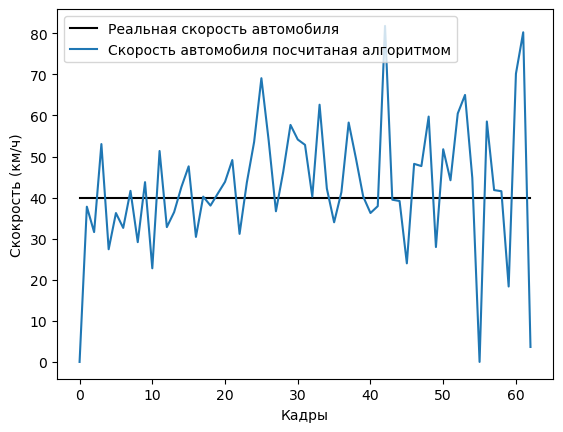

Mean:  42.85108213419042
std:  15.753795049254284


In [23]:
# plt.plot(df[df['id'] == 13]['x'], df[df['id'] == 13]['y'])
# plt.show()
speed = np.array(df[df['id'] == 9]['speed'])
x = np.arange(len(speed))
# trend = np.poly1d(np.polyfit(x, speed, 1))
# plt.plot(x, trend(x))
plt.plot(x, np.linspace(40, 40, len(x)), 'black')
plt.plot(x, speed)
plt.xlabel("Кадры")
plt.ylabel("Скокрость (км/ч)")
plt.legend(["Реальная скорость автомобиля","Скорость автомобиля посчитаная алгоритмом", "Линия тренда"])
plt.show()
print("Mean: ", np.mean(speed))
print("std: ", np.std(speed))

In [17]:
# plt.plot(df[df['id'] == 13]['x'], df[df['id'] == 13]['y'])
# plt.show()
speed = np.array(df[df['id'] == 9]['speed'].rolling(window=2).sum())
x = np.arange(len(speed))
trend = np.poly1d(np.polyfit(x, speed, 1))
plt.plot(x, np.linspace(40, 40, len(x)), 'black')
plt.plot(x, speed)
plt.plot(x, trend(x))
plt.xlabel("Кадры")
plt.ylabel("Скокрость (км/ч)")
plt.legend(["Реальная скорость автомобиля","Скорость автомобиля посчитаная алгоритмом", "Линия тренда"])
plt.show()
print("Mean: ", np.mean(speed))
print("std: ", np.std(speed))

LinAlgError: SVD did not converge in Linear Least Squares

отфильтровать график скорости

id
0.0     AxesSubplot(0.125,0.11;0.775x0.77)
1.0     AxesSubplot(0.125,0.11;0.775x0.77)
2.0     AxesSubplot(0.125,0.11;0.775x0.77)
3.0     AxesSubplot(0.125,0.11;0.775x0.77)
4.0     AxesSubplot(0.125,0.11;0.775x0.77)
5.0     AxesSubplot(0.125,0.11;0.775x0.77)
6.0     AxesSubplot(0.125,0.11;0.775x0.77)
7.0     AxesSubplot(0.125,0.11;0.775x0.77)
8.0     AxesSubplot(0.125,0.11;0.775x0.77)
9.0     AxesSubplot(0.125,0.11;0.775x0.77)
10.0    AxesSubplot(0.125,0.11;0.775x0.77)
11.0    AxesSubplot(0.125,0.11;0.775x0.77)
12.0    AxesSubplot(0.125,0.11;0.775x0.77)
13.0    AxesSubplot(0.125,0.11;0.775x0.77)
14.0    AxesSubplot(0.125,0.11;0.775x0.77)
15.0    AxesSubplot(0.125,0.11;0.775x0.77)
16.0    AxesSubplot(0.125,0.11;0.775x0.77)
17.0    AxesSubplot(0.125,0.11;0.775x0.77)
18.0    AxesSubplot(0.125,0.11;0.775x0.77)
19.0    AxesSubplot(0.125,0.11;0.775x0.77)
20.0    AxesSubplot(0.125,0.11;0.775x0.77)
21.0    AxesSubplot(0.125,0.11;0.775x0.77)
22.0    AxesSubplot(0.125,0.11;0.775x0.77)
23.0    

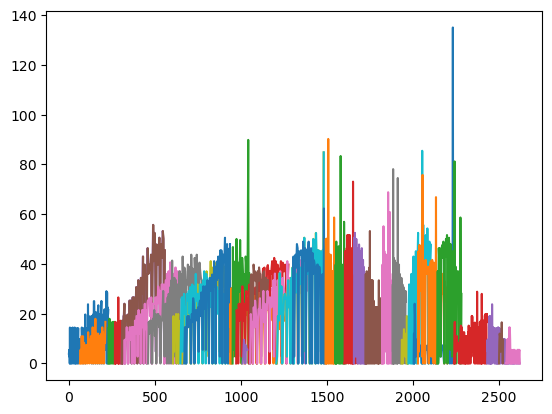

In [2]:
df.groupby(by=['id'])['speed'].plot()

<AxesSubplot:>

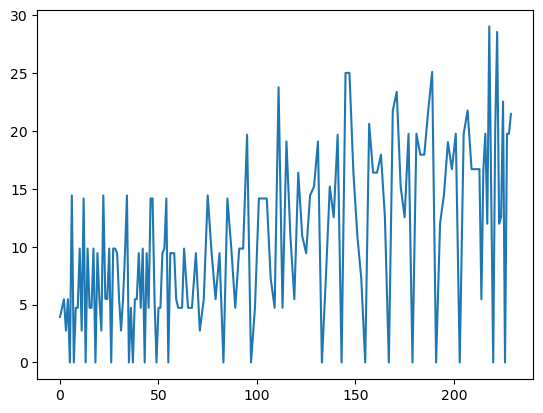

In [3]:
df[df['id']==0]['speed'].plot()